In [52]:
# Include libraries which may use in implementation
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.image import imread
import glob
import cv2 as img
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline


In [16]:
train_x=[]
train_y = []
test_x = []
test_y = []

path = 'C:\\Users\\Tauseef Chahal\\DeepLearning_Code\\Deep\\Assignment2\\Task3_Data\\'
for i in range(10):
    for filename in glob.glob(path+'\\train\\'+str(i)+'\\*.png'):
        im = img.imread(filename)
        train_x.append(im)
        train_y.append(i)
for i in range(10):
    for filename in glob.glob(path+'\\test\\'+str(i)+'\\*.png'):
        im = img.imread(filename)
        test_x.append(im)
        test_y.append(i)


train_x = np.array(train_x)
train_y = np.array(train_y)
test_x = np.array(test_x)
test_y = np.array(test_y)

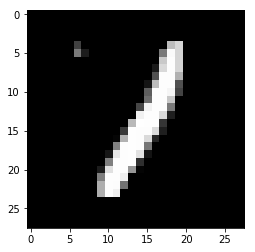

In [73]:

plt.imshow(train_x[9000])

In [74]:
print(train_x.shape)

print(m)

(60000, 28, 28, 3)
30000


In [4]:
enc = OneHotEncoder(handle_unknown='ignore')

enc.fit(train_y.reshape(train_y.shape[0],1))
train_y_hat = enc.transform(train_y.reshape(train_y.shape[0],1))
train_y_hat.shape

(60000, 10)

In [18]:
import scipy.io #loading data from a mat file
data = scipy.io.loadmat('filters.mat') 
filters = data['filters'] 
filters = np.array(filters)
filters.shape

(17, 17, 36)

In [25]:
#filters[0].shape[-1]
filters.shape[2]

36

In [26]:
def conv_single_step(img_patch, filters):
    x_w = np.multiply(img_patch,filters)
    return np.sum(x_w)

In [35]:
def conv_forward(x,filters):

    filters_dim , filters_dim , n_b = filters.shape
    m , image_dim , image_dim , channels = train_x.shape
    new_img = image_dim - filters_dim + 1
    
    new_dim = np.zeros((m, n_b, new_img, new_img));
    for i in range(m):
         for j in range(n_b):
            
            temp_img = np.zeros((new_img, new_img))
            for c in range(channels):
                f = filters[:, :,j]
                image   = x[i, :, :, c]
                temp_img = temp_img + conv_single_step(i, j);

            new_dim[i, j, :, :] = temp_img
    return new_dim

In [32]:
convulved = conv_forward(train_x,filters)

In [43]:
print(convulved.shape[1])

36


In [ ]:
def relu(feature_map):
    #Preparing the output of the ReLU activation function.
    relu_out = np.zeros(feature_map.shape)
    for map_num in range(feature_map.shape[-1]):
        for r in np.arange(0,feature_map.shape[0]):
            for c in np.arange(0, feature_map.shape[1]):
                relu_out[r, c, map_num] = np.max([feature_map[r, c, map_num].all(), 0])
    return relu_out

In [38]:
def pooling(feature_map, size=2, stride=2):
       m , filter_dim,img_dim , img_dim =feature_map.shape
    max_pool = np.zeros((np.uint16((m-size+1)/stride+1),
                            np.uint16((filter_dim -size+1)/stride+1),
                            img_dim))
    for i in range(img_dim):
        img = 0
        for j in np.arange(0,m-size+1, stride):
            fil = 0
            for c in np.arange(0, filter_dim-size+1, stride):
                max_pool[img, fil, i] = np.max([feature_map[j:j+size,  i:i+size]])
                fil = fil + 1
            img = img +1
    return max_pool

In [54]:
maxpool = pooling((convulved))
print(maxpool.shape)

(30000, 18, 12)


In [58]:
X = np.zeros((maxpool.shape[0],np.prod(maxpool.shape[1:])))
for i in range(X.shape[0]):
    X[i,:] = maxpool[i].flatten(order='C')
print(X.shape)

(30000, 216)


In [68]:
def softmax(A):  
    expA = np.exp(A)
    return expA / expA.sum()

In [61]:
m , attr = X.shape
hidden_nodes=4
output_labels=10


In [66]:
def sigmoid(s):
    return 1/(1+np.exp(-s))
def sigmoid_derivative(  s):
    return self.sigmoid(s)* (1 - self.sigmoid(s))

In [62]:
w1 = np.random.rand(m,hidden_nodes)  
b1 = np.random.randn(hidden_nodes)

w2 = np.random.rand(hidden_nodes,output_labels)  
b2 = np.random.randn(output_labels)  
lr = 0.003

In [70]:
for epoch in range(4):
#forward_Progpogate
    z = np.dot(X.T, w1) + b1
    a1 = sigmoid(z)

    z_out = np.dot(a1, w2) + b2
    a2 = softmax(z_out)

#back_progpogate
    dcost_dzo = a2 - train_y
    dzo_dwo = a1

    dcost_w2 = np.dot(dzo_dwo.T, dcost_dzo)

    dcost_b2 = dcost_dzo

    dzo_dah = w2
    dcost_dah = np.dot(dcost_dzo , dzo_dah.T)
    dah_dzh = sigmoid_der(zh)
    dzh_dwh = feature_set
    dcost_wh = np.dot(dzh_dwh.T, dah_dzh * dcost_dah)

    dcost_bh = dcost_dah * dah_dzh
    wh -= lr * dcost_wh
    bh -= lr * dcost_bh.sum(axis=0)

    wo -= lr * dcost_wo
    bo -= lr * dcost_bo.sum(axis=0)

ValueError: operands could not be broadcast together with shapes (216,10) (60000,) 